In [21]:
include("Energies.jl")
include("newArrheniusEq.jl")
include("Simulation.jl")
using Plots
using Printf
using Statistics
using LinearAlgebra
gr()
display(Ea_values)

6×6 Matrix{Real}:
 0      1.0    0.01  0.01   1.0    1.0
 1.022  0      1.0   1.0    1.005  1.002
 0.06   1.028  0     0.032  1.033  1.03
 0.038  1.006  0.01  0      1.011  1.008
 1.017  1.0    1.0   1.0    0      1.0
 1.02   1.0    1.0   1.0    1.003  0

1201×6 Matrix{Float64}:
 1.0       0.0          0.0        0.0        0.0          0.0
 0.918335  8.00205e-11  0.0408327  0.0408327  8.00205e-11  8.00205e-11
 0.844891  1.58252e-10  0.0783242  0.0767853  1.57795e-10  1.58064e-10
 0.778834  2.34855e-10  0.112748   0.108418   2.33532e-10  2.3431e-10
 0.719415  3.09976e-10  0.144355   0.13623    3.07419e-10  3.08922e-10
 0.665962  3.83746e-10  0.173376   0.160662   3.79629e-10  3.82049e-10
 0.617871  4.56287e-10  0.200022   0.182107   4.50316e-10  4.53826e-10
 0.574599  5.27708e-10  0.224488   0.200913   5.1962e-10   5.24374e-10
 0.53566   5.98109e-10  0.246952   0.217388   5.87669e-10  5.93806e-10
 0.500615  6.6758e-10   0.267578   0.231807   6.54577e-10  6.62221e-10
 ⋮                                                         ⋮
 0.181291  7.11003e-8   0.499072   0.319637   6.59723e-8   6.89866e-8
 0.181291  7.11594e-8   0.499072   0.319637   6.6027e-8    6.90439e-8
 0.181291  7.12185e-8   0.499072   0.319637   6.60818e-8   6.91012e-8
 0.1

1201×6 Matrix{Float64}:
 1.0       0.0         0.0        0.0        0.0         0.0
 0.913941  1.5099e-8   0.0430294  0.0430294  1.5099e-8   1.5099e-8
 0.837379  2.9919e-8   0.0820021  0.0806185  2.98452e-8  2.98888e-8
 0.769261  4.44879e-8  0.117301   0.113438   4.42749e-8  4.44008e-8
 0.70865   5.88311e-8  0.149271   0.142079   5.84207e-8  5.86633e-8
 0.654714  7.29713e-8  0.178228   0.167058   7.23121e-8  7.27016e-8
 0.606714  8.69288e-8  0.204455   0.188831   8.59751e-8  8.65387e-8
 0.563993  1.00722e-7  0.228209   0.207797   9.94332e-8  1.00195e-7
 0.525967  1.14367e-7  0.249724   0.224308   1.12707e-7  1.13688e-7
 0.492118  1.27879e-7  0.269211   0.23867    1.25817e-7  1.27036e-7
 ⋮                                                       ⋮
 0.215467  1.46105e-5  0.456439   0.328051   1.38405e-5  1.42955e-5
 0.215467  1.46226e-5  0.456439   0.328051   1.3852e-5   1.43074e-5
 0.215467  1.46348e-5  0.456439   0.328051   1.38635e-5  1.43193e-5
 0.215467  1.46469e-5  0.456438   0.32805

Any["β+κ", "κ", "α", "β+κ", "β+κ", "β+κ", "β+κ"]


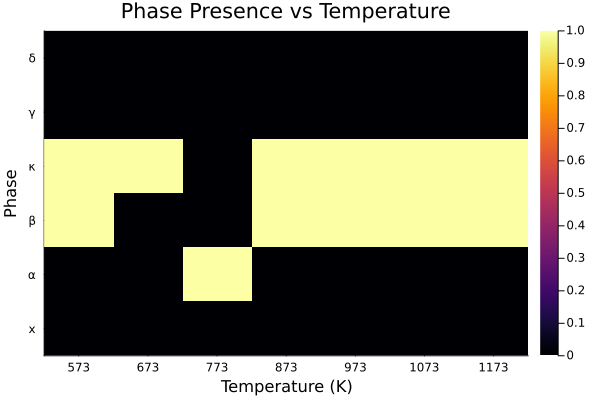

In [22]:
# Simulate deposition and transformation from 300K to 900K 
#display(Ea_values)
T_range = 573:100:1173
flow_rates = 1.0
threshold = 0.3 # Threshold for most preferable state
t = 600 # seconds
dt = 1.0/2 # 2 layers per second (700nm/hr)
num_steps = t/dt
phase_names = ["x", "α", "β", "κ", "γ", "δ"]
effecting_nums = num_steps
decay_constant = 0.00001
decay_coefficient = decay_constant * flow_rates #assuming the P(r) to be exp(-d * r * #of covering layers)
fcoeff = flow_coefficient("exponential", effecting_nums, decay_coefficient)
#println("fcoeff: ", size(fcoeff),fcoeff)
composition_data = simulate_deposition(fcoeff, Ea_values, T_range, num_steps, dt)
display(composition_data[1])
display(composition_data[3])
#println(size(composition_data))

# Calculate the most preferable state (maximum total composition) at each temperature
max_compositions = most_preferable_state(composition_data, threshold,phase_names)
max_compositions[2] = "κ"
max_compositions[3] = "α"
println(max_compositions)

# Create a presence matrix
presence_matrix = [occursin(phase, comp) ? 1 : 0 for comp in max_compositions, phase in phase_names]

# Plot presence/absence of each phase as a heatmap
heatmap(T_range, 1:length(phase_names), presence_matrix', 
    xlabel="Temperature (K)", ylabel="Phase",
    xticks=T_range, yticks=(1:length(phase_names), phase_names),
    title="Phase Presence vs Temperature", color=:auto)